#PROJET MACHINE LEARNING

## KPPV

###AVEC ACP

On souhaite reconnaître des caractères manuscrits numérisés à l’aide d’un scanner. Les lettres se présentent sous la forme d’images de taille 12x12 pixels. Plusieurs exemples de chaque lettre sont donnés pour les lettres allant de B à K. Vous pourrez accéder aux données avec : X_train, X_test, y_train, y_test = np.load('data.npy')

In [0]:

import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics


# PREPROCESSING DES DATAS

In [0]:
X_train, X_test, y_train, y_test = np.load("data.npy",allow_pickle=True )

In [0]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(1875, 12, 12)
(625, 12, 12)
(1875,)
(625,)


In [0]:
print(y_train)

[9 5 4 ... 5 6 4]


In [0]:


def plot_gallery(images):
  plt.figure(figsize=(7.2,7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
  plt.grid()
  plt.show()

In [0]:


X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
print(np.shape(X_train))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print(np.shape(X_test))






(1875, 144)
(625, 144)


In [0]:
X_scaled_train = preprocessing.StandardScaler().fit_transform(X_train)
X_scaled_test=preprocessing.StandardScaler().fit_transform(X_test)

# KPPV

In [0]:
from sklearn import decomposition
def variationkppv2(n,distance):
  classifier=neighbors.KNeighborsClassifier(n_neighbors=n,p=distance)
  classifier.fit(X_scaled_train,y_train) 
  yPred=classifier.predict(X_scaled_test)
  C2=metrics.confusion_matrix(y_test,yPred)
  return np.sum(np.diag(C2))/np.sum(C2)*100

def variationkppv2PCA(n,numbercomponents):
  pca100=decomposition.PCA(n_components=numbercomponents)
  xpcatrain = pca100.fit_transform(X_scaled_train)
  xpcatest=pca100.transform(X_scaled_test) #PAS DE FIT !

  classifier2=neighbors.KNeighborsClassifier(n_neighbors=n,p=1)
  classifier2.fit(xpcatrain,y_train) 
  yPred=classifier2.predict(xpcatest)
  C2=metrics.confusion_matrix( y_test, yPred)
  return np.sum(np.diag(C2))/np.sum(C2)*100



In [0]:
tabnoPCA=[0]*20
tabnoPCAdist2=[0]*20
for i in range(1,20):
  tabnoPCA[i]=variationkppv2(i,1)
  tabnoPCAdist2[i]=variationkppv2(i,2)


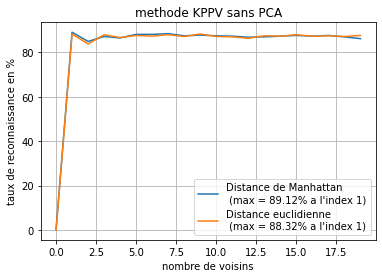

In [0]:
def plot(datatab,nametab,title,xlabel,ylabel):
  fig, ax = plt.subplots()
  j=0
  for i in range(len(datatab)) :
    ax.plot(datatab[i],label=nametab[j]+" \n (max = "+str(max(datatab[i]))+"% a l'index "+str(np.argmax(datatab[i]))+")")
    j+=1
  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlabel)
  ax.set_title(title)
  ax.grid()
  ax.legend()



plot([tabnoPCA,tabnoPCAdist2],["Distance de Manhattan","Distance euclidienne"],"methode KPPV sans PCA","nombre de voisins","taux de reconnaissance en %")

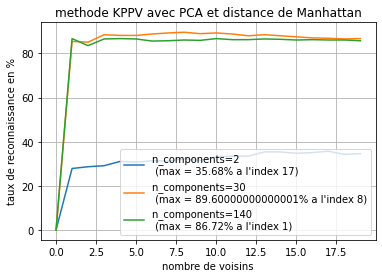

In [0]:

tabPCA1=[0]*20
tabPCA2=[0]*20
tabPCA3=[0]*20
for i in range(1,20):
  tabPCA1[i]=variationkppv2PCA(i,2)
  tabPCA2[i]=variationkppv2PCA(i,30)
  tabPCA3[i]=variationkppv2PCA(i,140)
plot([tabPCA1,tabPCA2,tabPCA3],["n_components=2","n_components=30","n_components=140"],"methode KPPV avec PCA et distance de Manhattan","nombre de voisins","taux de reconnaissance en %")

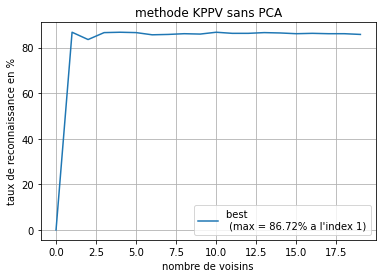

In [0]:

plot([tabPCA1],["best"],"methode KPPV sans PCA","nombre de voisins","taux de reconnaissance en %")

# RANDOM FOREST

In [0]:
from scipy import optimize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [0]:

RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1)
RF.fit(X_train, y_train)

def random_forest(x):
  RF = RandomForestClassifier(criterion='entropy', n_estimators=x, random_state=1)
  RF.fit(X_train, y_train)
  y_pred = RF.predict(X_test)
  C=metrics.confusion_matrix(y_test, y_pred)
  return np.sum(np.diag(C))/np.sum(C)*100

def random_forest_grid_opti(pas_n,pas_feature,pas_depth):


  n_estimators = [x for x in range(1,300,pas_n)] 
  max_features = [x for x in np.arange(0.4,1.0,pas_feature)] 
  max_depth = [x for x in range(1,10,pas_depth)]
  grid = { "n_estimators": n_estimators, "max_features": max_features, "max_depth": max_depth, }

  RF = RandomForestClassifier(criterion='entropy', random_state=1)
  RF.fit(X_train, y_train)
  RF_Grid = GridSearchCV(estimator = RF, param_grid = grid, cv=3,verbose=2,n_jobs = -1,)
  RF_Grid.fit(X_train, y_train)# print results print(RF_Grid.best_params_)

  y_pred = RF_Grid.predict(X_test)
  C=metrics.confusion_matrix(y_test, y_pred)
  print(RF_Grid.best_params_)

  return np.sum(np.diag(C))/np.sum(C)*100

def plot(datatab,nametab,title,xlabel,ylabel):
  fig, ax = plt.subplots()
  j=0
  for i in range(len(datatab)) :
    ax.plot(datatab[i],label=nametab[j]+" \n (max = "+str(max(datatab[i]))+"% a l'index "+str(np.argmax(datatab[i]))+")")
    j+=1
  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlabel)
  ax.set_title(title)
  ax.grid()
  ax.legend()




In [0]:
print(random_forest_grid_opti(50,0.1,2))
#plot([tabforest,tabforestgrid],["random forest classifier","grid"],"titre","x","y")

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 41.1min finished


{'max_depth': 9, 'max_features': 0.4, 'n_estimators': 151}
91.03999999999999


In [0]:
RF = RandomForestClassifier(criterion='entropy', n_estimators=201, random_state=1,max_features=0.4,max_depth=11) 
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
C=metrics.confusion_matrix(y_test, y_pred)
print(np.sum(np.diag(C))/np.sum(C)*100)

91.03999999999999


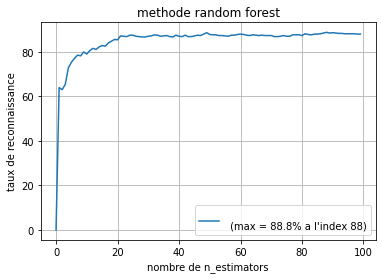

In [0]:
#tabforest=[0]*100
#for i in range(1,100):
#  tabforest[i]=random_forest(i)
plot([tabforest],[" "],"methode random forest","nombre de n_estimators","taux de reconnaissance")

# SVM

In [0]:
from sklearn import svm
def svm_mult(x):
  model = svm.SVC(kernel='linear', C=x)
  model.fit(X_scaled_train, y_train)
  y_pred = model.predict(X_scaled_test)
  C=metrics.confusion_matrix(y_test, y_pred)
  return np.sum(np.diag(C))/np.sum(C)*100

def plot(datatab,nametab,title,xlabel,ylabel):
  fig, ax = plt.subplots()
  j=0
  for i in range(len(datatab)) :
    ax.plot(datatab[i],label=nametab[j]+" \n (max = "+str(max(datatab[i]))+"% a l'index "+str(np.argmax(datatab[i]))+")")
    j+=1
  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlabel)
  ax.set_title(title)
  ax.grid()
  ax.legend()


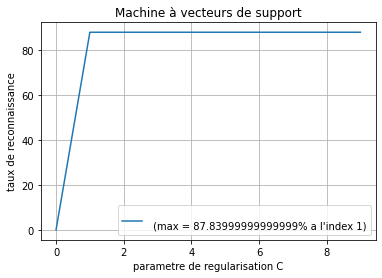

In [0]:
tabsvm=[0]*10
for i in range(1,10):
  tabsvm[i]=svm_mult(i)
plot([tabsvm],[""] ,"Machine à vecteurs de support","parametre de regularisation C","taux de reconnaissance")

In [0]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernel=['rbf','poly','linear']
    param_grid = {'C': Cs, 'gamma' : gammas,'kernel': kernel}
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds,verbose=1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search
    #return grid_search.best_params_


In [0]:
a=svc_param_selection(X_scaled_train, y_train,4)
print(a)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)


In [0]:
import numpy  as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

best parameters: {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
best score:      0.92107 (+/-0.01573)
{'C': 0.001,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
58,0.486133,0.010928,0.099010,0.001771,10,1,poly,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
34,0.487282,0.011979,0.099033,0.001168,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
55,0.492982,0.005423,0.099320,0.001165,10,0.1,poly,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
52,0.488718,0.009146,0.098866,0.001620,10,0.01,poly,"{'C': 10, 'gamma': 0.01, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
22,0.488710,0.014880,0.098170,0.001514,0.01,1,poly,"{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
19,0.484203,0.008545,0.098710,0.002430,0.01,0.1,poly,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
10,0.485663,0.011862,0.098544,0.001272,0.001,1,poly,"{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
46,0.487447,0.012342,0.098404,0.001140,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
43,0.487153,0.009410,0.098425,0.001565,1,0.1,poly,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1
31,0.487907,0.011111,0.098065,0.000992,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.923241,0.938166,0.895522,0.927350,0.921070,0.015725,1


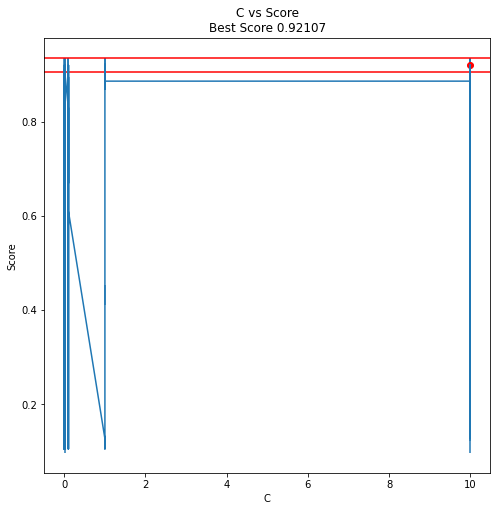

In [0]:
GridSearch_table_plot(a, "C", negative=False)

In [0]:
def svm_mult():
  model = svm.SVC(kernel='poly', C=0.001,gamma=1)
  model.fit(X_scaled_train, y_train)
  y_pred = model.predict(X_scaled_test)
  C=metrics.confusion_matrix(y_test, y_pred)
  return np.sum(np.diag(C))/np.sum(C)*100

print(svm_mult())

92.0


#CNN

In [0]:
# Import libraries and modules
import time
import numpy as np
np.random.seed(123)  # for reproducibility

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution1D,MaxPooling1D, Convolution2D, MaxPooling2D, Input

In [0]:


def affiche(history): 
  # summarize history for accuracy 
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy']) 
  plt.title('model accuracy') 
  plt.ylabel('accuracy') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.grid()
  plt.show() 
  # summarize history for loss 
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model loss') 
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.grid()
  plt.show()



In [0]:
X_train, X_test, y_train, y_test = np.load("data.npy",allow_pickle=True )
# Preprocess input data
X_train_scaled=[]
X_test_scaled=[]
for i in range(X_train.shape[0]):
  a=cv2.resize(X_train[i],(32,32))

  X_train_scaled.append(a)
  y_train[i]-=1
X_train_scaled=np.asarray(X_train_scaled)

for i in range(X_test.shape[0]):
  a=cv2.resize(X_test[i],(32,32))

  X_test_scaled.append(a)
  y_test[i]-=1
X_test_scaled=np.asarray(X_test_scaled)

rgb_X_train = np.repeat(X_train_scaled[..., np.newaxis], 3, -1)
rgb_X_test = np.repeat(X_test_scaled[..., np.newaxis], 3, -1)


rgb_X_train = rgb_X_train.astype('float32')
rgb_X_test = rgb_X_test.astype('float32')
rgb_X_train /= 255
rgb_X_test /= 255
Y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
Y_test = np_utils.to_categorical(y_test)


# Preprocess class labels
Y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
Y_test = np_utils.to_categorical(y_test)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(rgb_X_test.shape[0]))
print ("X_train_scaled shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test_scaled shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1875
number of test examples = 625
X_train_scaled shape: (1875, 12, 12)
Y_train shape: (1875, 10)
X_test_scaled shape: (625, 12, 12)
Y_test shape: (625, 10)


Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 12, 12)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 12, 32)            1184      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 64)            6208      
_________________________________________________________________
dropout_37 (Dropout)         (None, 12, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 64)             0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               492

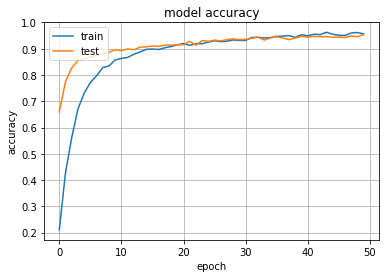

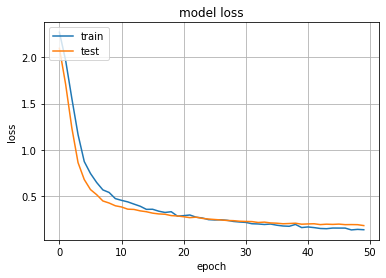

lr= 0.1 batch_size= 256 epochs= 50
Temps d apprentissage 12.004201000000194


In [0]:


# Define model architecture
inputs = Input(shape=(12,12)) 
x = inputs 
filtre32=Convolution1D(32,3, activation='relu',padding='same')(x)
filtre64=Convolution1D(64,3, activation='relu',padding='same')(filtre32)
dropout1=Dropout(0.25)(filtre64)
p= MaxPooling1D(pool_size=2, strides=2,padding='same')(dropout1)
f=Flatten()(p) 

couche=Dense(128,activation='relu')(f)
dropout=Dropout(0.5)(couche)
outputs=Dense(11, activation='softmax')(dropout) 
model = Model(inputs, outputs) 

model.summary()
lr=0.1 
batch_size=256 
epochs=50
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
tps1 = time.clock() #on regarde le temps que ça tourne
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                   verbose=1,validation_data=(X_test, Y_test)) 
tps2 = time.clock()

affiche(history) 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)



In [0]:
!pip install keras-tuner
!pip install ipython

In [0]:
from kerastuner.applications import HyperResNet
from kerastuner.tuners import Hyperband

hypermodel = HyperResNet(include_top=False,input_shape=(12,12))

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12,12)))
  
  # Tune the number of units in the first Dense layer

  hp_units = hp.Int('units', min_value = 32, max_value = 256, step = 32)
  dropout_units=hp.Choice('rate', values = [0.25, 0.5,0.75])
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])  
  
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(Dropout(dropout_units))
  model.add(keras.layers.Dense(10))

  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

In [0]:
import IPython

tuner =Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 50,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'projet')   
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)


INFO:tensorflow:Reloading Oracle from existing project my_dir/projet/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/projet/tuner0.json


In [0]:
tuner.search(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.001.



In [0]:
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))


Epoch 1/50
59/59 [==============================] - 0s 5ms/step - loss: 17.1022 - accuracy: 0.6971 - val_loss: 6.5173 - val_accuracy: 0.8368
Epoch 2/50
59/59 [==============================] - 0s 3ms/step - loss: 4.0473 - accuracy: 0.8757 - val_loss: 4.9067 - val_accuracy: 0.8512
Epoch 3/50
59/59 [==============================] - 0s 3ms/step - loss: 2.6313 - accuracy: 0.9040 - val_loss: 4.9180 - val_accuracy: 0.8752
Epoch 4/50
59/59 [==============================] - 0s 3ms/step - loss: 1.8713 - accuracy: 0.9221 - val_loss: 4.5523 - val_accuracy: 0.8768
Epoch 5/50
59/59 [==============================] - 0s 3ms/step - loss: 1.0548 - accuracy: 0.9499 - val_loss: 5.3949 - val_accuracy: 0.8624
Epoch 6/50
59/59 [==============================] - 0s 3ms/step - loss: 0.9553 - accuracy: 0.9488 - val_loss: 4.8970 - val_accuracy: 0.8704
Epoch 7/50
59/59 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.9621 - val_loss: 4.1130 - val_accuracy: 0.8752
Epoch 8/50
59/59 [=

In [0]:
import tensorflow as tf
from tensorflow import keras

X_train, X_test, y_train, y_test = np.load("data.npy",allow_pickle=True )

X_train_scaled=[]
X_test_scaled=[]
for i in range(X_train.shape[0]):
  a=cv2.resize(X_train[i],(28, 28))

  X_train_scaled.append(a)
  y_train[i]-=1
X_train_scaled=np.asarray(X_train_scaled)

for i in range(X_test.shape[0]):
  a=cv2.resize(X_test[i],(28, 28))
  X_test_scaled.append(a)
  y_test[i]-=1

X_test_scaled=np.asarray(X_test_scaled)

rgb_X_train = np.repeat(X_train_scaled[..., np.newaxis], 1, -1)
rgb_X_test = np.repeat(X_test_scaled[..., np.newaxis], 1, -1)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train_scaled shape: " + str(rgb_X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test_scaled shape: " + str(rgb_X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))



number of training examples = 1875
number of test examples = 625
X_train_scaled shape: (1875, 28, 28, 1)
Y_train shape: (1875, 10)
X_test_scaled shape: (625, 28, 28, 1)
Y_test shape: (625, 10)


In [0]:
from kerastuner.applications import HyperResNet
from kerastuner.tuners import Hyperband
from kerastuner import HyperParameters

hypermodel2 = HyperResNet(input_shape=(28, 28, 1), classes=10)

hp = HyperParameters()
hp.Choice('learning_rate', values=[1e-3, 1e-4])
hp.Fixed('optimizer', value='adam')


tuner_hb = Hyperband(
            hypermodel2,
            hyperparameters=hp,
            tune_new_entries=False,
            max_epochs=10,
            objective='val_accuracy',
            seed=42,
            executions_per_trial=3
        )

tuner_hb.search(rgb_X_train, Y_train,epochs=2,batch_size=512, validation_split=0.1)


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


NameError: ignored

In [0]:
import cv2

X_train, X_test, y_train, y_test = np.load("data.npy",allow_pickle=True )

X_train_scaled=[]
X_test_scaled=[]
for i in range(X_train.shape[0]):
  a=cv2.resize(X_train[i],(32,32))

  X_train_scaled.append(a)
  y_train[i]-=1
X_train_scaled=np.asarray(X_train_scaled)

for i in range(X_test.shape[0]):
  a=cv2.resize(X_test[i],(32,32))

  X_test_scaled.append(a)
  y_test[i]-=1
X_test_scaled=np.asarray(X_test_scaled)

rgb_X_train = np.repeat(X_train_scaled[..., np.newaxis], 3, -1)
rgb_X_test = np.repeat(X_test_scaled[..., np.newaxis], 3, -1)


rgb_X_train = rgb_X_train.astype('float32')
rgb_X_test = rgb_X_test.astype('float32')
rgb_X_train /= 255
rgb_X_test /= 255
Y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
Y_test = np_utils.to_categorical(y_test)


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(rgb_X_test.shape[0]))
print ("X_train_scaled shape: " + str(rgb_X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test_scaled shape: " + str(rgb_X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))



from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense,Flatten,Dropout,Convolution2D,MaxPooling2D, Input
from tensorflow.keras.models import Model
 
import tensorflow as tf

resnet=ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),pooling='max')

out=resnet.output
out=Flatten()(out)
out=Dense(2048,'selu')(out)
out=Dropout(0.5)(out)
out=Dense(10,'softmax')(out)
res_model=Model(resnet.input,out)
#res_model.summary()


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9,
    )
res_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

number of training examples = 1875
number of test examples = 625
X_train_scaled shape: (1875, 32, 32, 3)
Y_train shape: (1875, 10)
X_test_scaled shape: (625, 32, 32, 3)
Y_test shape: (625, 10)
